In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
import geopandas as gpd
import descartes
import reverse_geocoder

In [2]:
df = pd.read_csv("meteorite-landings.csv")

In [3]:
df.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
df.shape

(45716, 10)

In [17]:
df.fall.unique()

array(['Fell', 'Found'], dtype=object)

In [16]:
len(df.recclass.unique())

466

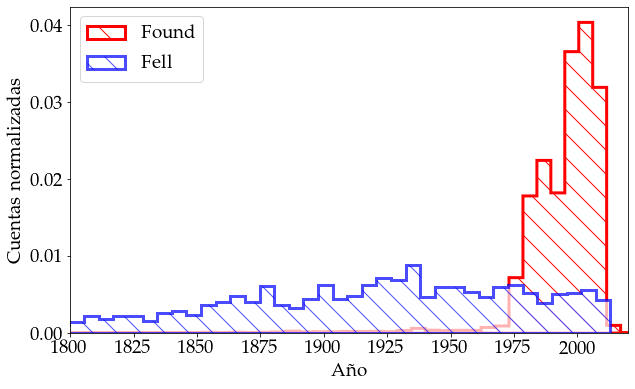

In [36]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['font.size'] = '19'
plt.hist(df[df.fall == "Found"].year, 400, histtype = "stepfilled", lw = 3, color = "w", density = True, hatch = "\\", edgecolor = "red", label = "Found")
plt.hist(df[df.fall == "Fell"].year, 200, histtype = "stepfilled", lw = 3, color = "w", density = True, hatch = "\\", edgecolor = "blue", label = "Fell", alpha = 0.7)
plt.xlim(1800, 2020)
plt.xlabel("Año")
plt.ylabel("Cuentas normalizadas")
plt.legend(loc = 2)
plt.savefig("year_vs_fall.jpg", dpi = 200)
plt.show()

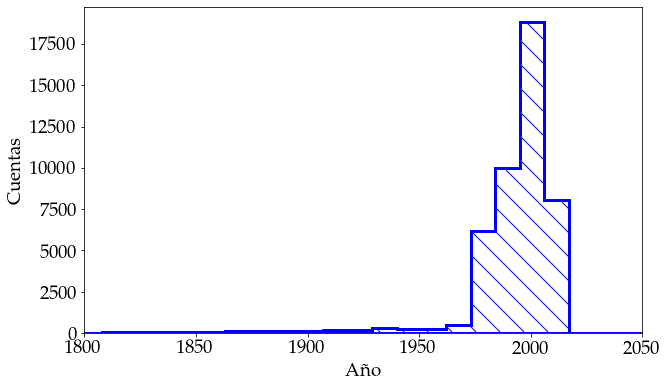

In [18]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['font.size'] = '19'
plt.hist(df.year, 200, histtype = "stepfilled", lw = 3, color = "w", hatch = "\\", edgecolor = "blue")
plt.xlim(1800, 2050)
plt.xlabel("Año")
plt.ylabel("Cuentas")
#plt.savefig("year_distribution.jpg", dpi = 200)
plt.show()

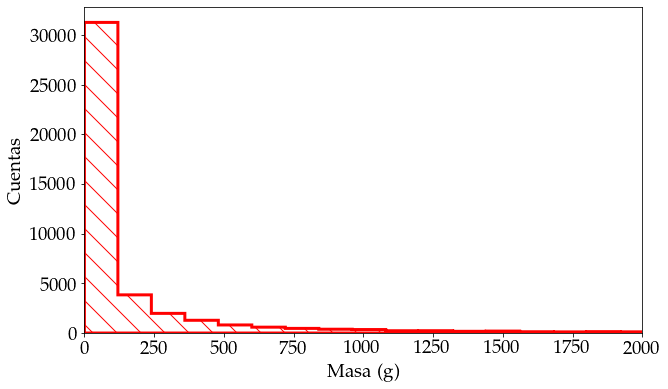

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['font.size'] = '19'
plt.hist(df.mass, bins = 500000, histtype = "stepfilled", lw = 3, color = "w", hatch = "\\", edgecolor = "red")
plt.xlim(0, 2000)
plt.xlabel("Masa (g)")
plt.ylabel("Cuentas")
#plt.savefig("mass_distribution.jpg", dpi = 200)
plt.show()

In [14]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

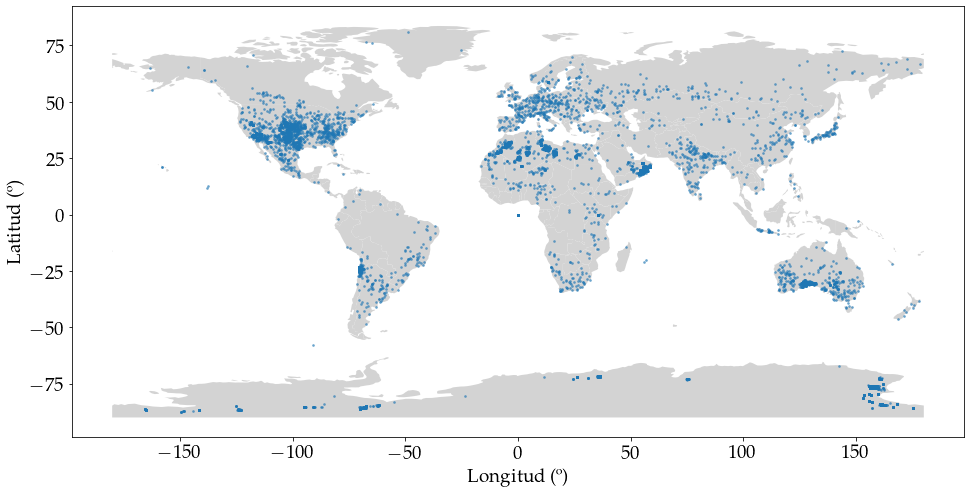

In [43]:
plt.rcParams["figure.figsize"] = (16,8)
countries.plot(color="lightgrey")
plt.scatter(x = df[df.reclong < 300].reclong, y = df[df.reclong < 300].reclat, s = 3, alpha = 0.5)
plt.xlabel("Longitud (º)")
plt.ylabel("Latitud (º)")
plt.savefig("geo_distribution.jpg", dpi = 250)
plt.show()

In [41]:
def fall_label(row):
    if row.fall == "Fell":
        return "red"
    else:
        return "green"

df["fall_label"] = df.apply(lambda row: fall_label(row), axis = 1)

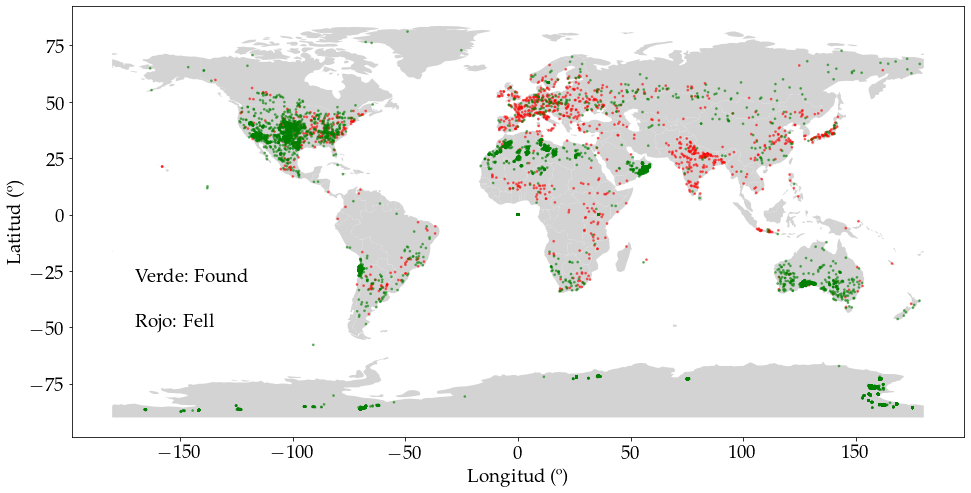

In [47]:
plt.rcParams["figure.figsize"] = (16,8)
countries.plot(color="lightgrey")
plt.scatter(x = df[df.reclong < 300].reclong, y = df[df.reclong < 300].reclat, c = df[df.reclong < 300].fall_label, s = 3, alpha = 0.5)
plt.xlabel("Longitud (º)")
plt.ylabel("Latitud (º)")
plt.text(-170, -30, "Verde: Found")
plt.text(-170, -50, "Rojo: Fell")
plt.savefig("geo_fall.jpg", dpi = 250)
plt.show()

In [50]:
df_sample = df.sample(frac = 0.02)
len(df_sample)

914

In [55]:
def country_location(row):
    coordinates = row.reclat, row.reclong
    try:
        geoc = reverse_geocoder.search(coordinates)
        return geoc[0]["cc"]
    except:
        return "unknown"

In [56]:
#df_sample["country"] = df_sample.apply(lambda row: country_location(row), axis = 1)